In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import summary_table

%matplotlib inline

In [2]:
df=pd.read_csv('./data/Smarket.csv', index_col=0)
df['Year']=pd.to_datetime(df['Year'], format="%Y")#.dt.year
up_down={'Up':1, 'Down':0}
df['Direction']=df['Direction'].map(up_down)

In [3]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [4]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null datetime64[ns]
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 97.7 KB


In [6]:
df.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


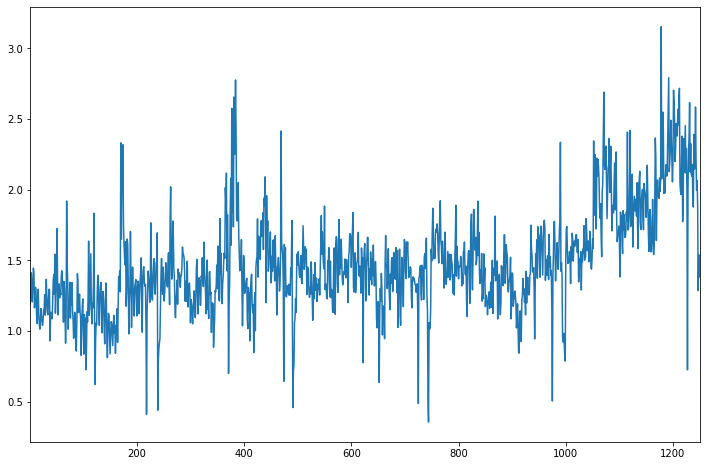

In [7]:
df['Volume'].plot(figsize=(12,8));

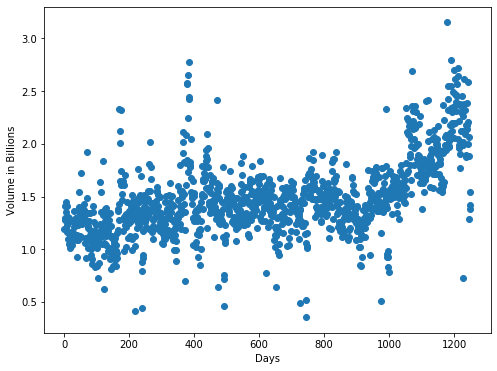

In [8]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x=df.index, y=df['Volume']);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

In [9]:
cols=' + '.join([f'{i}' for i in df.columns[1:-2]])

In [10]:
glm_fit=sm.logit(f'Direction~{cols}', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [11]:
print(glm_fit.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                0.002074
Time:                        11:38:26   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.3

In [12]:
glm_fit.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [13]:
pred=glm_fit.predict(df.iloc[:, 1:-2])
direction_predictions = [1 if el > 0.5 else 0 for el in pred]


In [14]:
direction_predictions[:10]

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
print(f"Confusion Matrix:\n{confusion_matrix(df['Direction'], direction_predictions)}")

Confusion Matrix:
[[145 457]
 [141 507]]


In [17]:
table=glm_fit.pred_table()
confusion_df = pd.DataFrame(table,['Down','Up'],['Down','Up'])
print(confusion_df)
print('\nThe model made', 
      (confusion_df.Down[0]+confusion_df.Up[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')

       Down     Up
Down  145.0  457.0
Up    141.0  507.0

The model made 0.5216 % correct predictions on the TRAINING SET.


In [31]:
train=df[df['Year']<'2005-01-01']
test=df[df['Year']>='2005-01-01']

In [32]:
glm_fit=sm.logit(f'Direction~{cols}', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [33]:
X_test=test.iloc[:, 1:-2]
y_test=test['Direction']

pred=glm_fit.predict(X_test)
pred=[1 if el > 0.5 else 0 for el in pred]

print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}")

Confusion Matrix:
[[77 34]
 [97 44]]


In [34]:
print(f'% correclty labeled {sum(y_test==pred)/len(y_test):.2f}%\n% incorreclty labeled {sum(y_test!=pred)/len(y_test):.2f}%')

% correclty labeled 0.48%
% incorreclty labeled 0.52%


In [35]:
glm_fit=sm.logit(f'Direction~Lag1+Lag2', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [36]:
pred=glm_fit.predict(X_test)
pred=[1 if el > 0.5 else 0 for el in pred]

print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred, )}")
print(f'% correclty labeled {sum(y_test==pred)/len(y_test):.2f}%\n\
% incorreclty labeled {sum(y_test!=pred)/len(y_test):.2f}%')

Confusion Matrix:
[[ 35  76]
 [ 35 106]]
% correclty labeled 0.56%
% incorreclty labeled 0.44%


In [37]:
print(classification_report(y_test, pred, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.50      0.32      0.39       111
          Up       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



In [38]:
d={'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]}
test=pd.DataFrame(d)

In [39]:
glm_fit.predict(d)

0    0.479146
1    0.496094
dtype: float64

# Linear Discriminant Analysis

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
predictors=['Lag1', 'Lag2']
X_train=train[predictors]
y_train=train['Direction']

In [29]:
LDA=LinearDiscriminantAnalysis()

In [42]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [45]:
print(f'Prior Probabilities of groups: {LDA.priors_}')
print(f'Group Means: {LDA.means_}')
print(f'Coefficients of Linear Discriminations: {LDA.coef_}')

Prior Probabilities of groups: [0.49198397 0.50801603]
Group Means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coefficients of Linear Discriminations: [[-0.05544078 -0.0443452 ]]


In [44]:
LDA.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [47]:
LDA_pred=LDA.predict(X_test[predictors])

In [58]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, LDA_pred, )}")
print(f'% correclty labeled {sum(y_test==LDA_pred)/len(y_test):.2f}%')

Confusion Matrix:
[[ 35  76]
 [ 35 106]]
% correclty labeled 0.56%


# Quadratic Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [53]:
QDA=QuadraticDiscriminantAnalysis()

In [54]:
QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [56]:
print(f'Prior Probabilities of groups: {QDA.priors_}')
print(f'Group Means: {QDA.means_}')

Prior Probabilities of groups: [0.49198397 0.50801603]
Group Means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [57]:
QDA_pred=QDA.predict(X_test[predictors])

In [59]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, QDA_pred, )}")
print(f'% correclty labeled {sum(y_test==QDA_pred)/len(y_test):.2f}%')

Confusion Matrix:
[[ 30  81]
 [ 20 121]]
% correclty labeled 0.60%


# K- Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
KNN=KNeighborsClassifier(n_neighbors=1)

In [63]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
KNN_pred=KNN.predict(X_test[predictors])

### Predictions ###
print(f"Confusion Matrix:\n{confusion_matrix(y_test, KNN_pred, )}")
print(f'% correclty labeled {sum(y_test==KNN_pred)/len(y_test):.2f}%')

Confusion Matrix:
[[43 68]
 [58 83]]
% correclty labeled 0.50%


In [66]:
### K=3
KNN3=KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X_train, y_train)

KNN3_pred=KNN3.predict(X_test[predictors])

### Predictions ###
print(f"Confusion Matrix:\n{confusion_matrix(y_test, KNN3_pred, )}")
print(f'% correclty labeled {sum(y_test==KNN3_pred)/len(y_test):.2f}%')

Confusion Matrix:
[[48 63]
 [55 86]]
% correclty labeled 0.53%
